<a href="https://colab.research.google.com/github/sunyingjian/-Logging-related-network/blob/master/%E9%87%87%E7%94%A8PCA_KPCA_LDA_%E5%81%9A%E6%95%B0%E6%8D%AE%E9%99%8D%E7%BB%B4%E4%BB%A5%E7%BE%8E%E5%9B%BD%E6%B2%B9%E7%94%B0%E4%B8%BA%E4%BE%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font size=5px color="red">✦ *Google Colab 突破90分钟自动断开:</font>
<p><font size=3px > 每60分钟自动运行代码以刷新90分钟断开限制. 打开 developer-settings (在你的浏览器) 快速健 Ctrl+Shift+I 然后按console 输入以下代码 Enter. ( mac 按 Option+Command+I)</p><b>复制以下隐藏代码粉贴在浏览器console！！不要关闭浏览器以免失效</b>

<code>function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-connect-button").click() 
}setInterval(ClickConnect,6000)</code>

In [2]:
#@markdown <h3>← 输入了代码后运行以防止断开</h>


import IPython
from google.colab import output

display(IPython.display.Javascript('''
 function ClickConnect(){
   btn = document.querySelector("colab-connect-button")
   if (btn != null){
     console.log("Click colab-connect-button"); 
     btn.click() 
     }
   
   btn = document.getElementById('ok')
   if (btn != null){
     console.log("Click reconnect"); 
     btn.click() 
     }
  }
  
setInterval(ClickConnect,60000)
'''))

print("Done.")

<IPython.core.display.Javascript object>

Done.


#准备数据

In [3]:
! git clone https://github.com/sunyingjian/numpy-.git
! git clone https://github.com/seg/tutorials-2016.git

Cloning into 'numpy-'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 59 (delta 22), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (59/59), done.
Cloning into 'tutorials-2016'...
remote: Enumerating objects: 161, done.
remote: Total 161 (delta 0), reused 0 (delta 0), pack-reused 161
Receiving objects: 100% (161/161), 16.86 MiB | 25.85 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [4]:
import os
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
%matplotlib inline
#%matplotlib inline 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步。
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option
set_option("display.max_rows", 10)#设置要显示的默认行数，显示的最大行数是10
pd.options.mode.chained_assignment = None #为了在增加列表行数的时候防止出现setting with copy warning
filename = 'facies_vectors.csv'
training_data = pd.read_csv('/content/tutorials-2016/1610_Facies_classification/training_data.csv')
training_data

,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
3227,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
3228,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
3229,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
3230,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [6]:
training_data['Well Name'] = training_data['Well Name'].astype('category')
training_data['Formation'] = training_data['Formation'].astype('category')
training_data['Well Name'].unique()

[SHRIMPLIN, SHANKLE, LUKE G U, CROSS H CATTLE, NOLAN, Recruit F9, NEWBY, CHURCHMAN BIBLE]
Categories (8, object): [SHRIMPLIN, SHANKLE, LUKE G U, CROSS H CATTLE, NOLAN, Recruit F9, NEWBY,
                         CHURCHMAN BIBLE]

In [7]:
# 1=sandstone  2=c_siltstone   3=f_siltstone 
# 4=marine_silt_shale 5=mudstone 6=wackestone 7=dolomite
# 8=packstone 9=bafflestone
facies_colors = ['#F4D03F', '#F5B041','#DC7633','#6E2C00',
       '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D']

facies_labels = ['SS', 'CSiS', 'FSiS', 'SiSh', 'MS',
                 'WS', 'D','PS', 'BS']
#facies_color_map is a dictionary that maps facies labels
#to their respective colors
facies_color_map = {}
for ind, label in enumerate(facies_labels):
    facies_color_map[label] = facies_colors[ind]

def label_facies(row, labels):
    return labels[ row['Facies'] -1]
    
training_data.loc[:,'FaciesLabels'] = training_data.apply(lambda row: label_facies(row, facies_labels), axis=1) #建立标签
training_data.describe()

,Facies,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


SS      259
CSiS    738
FSiS    615
SiSh    184
MS      217
WS      462
D        98
PS      498
BS      161
Name: Facies, dtype: int64

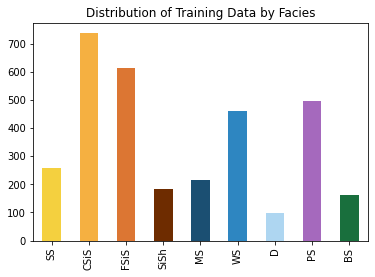

In [8]:
#count the number of unique entries for each facies, sort them by facies number (instead of by number of entries)
#计算每个相的唯一条目数，然后按相数（而不是条目数）对它们进行排序
facies_counts = training_data['Facies'].value_counts().sort_index()
#use facies labels to index each count
#使用相标签索引每个计数
facies_counts.index = facies_labels

facies_counts.plot(kind='bar',color=facies_colors, 
                   title='Distribution of Training Data by Facies')
facies_counts

In [9]:
correct_facies_labels = training_data['Facies'].values

feature_vectors = training_data.drop(['Formation', 'Well Name', 'Depth','Facies','FaciesLabels'], axis=1)
feature_vectors.describe()

,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [10]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        scaled_features, correct_facies_labels, test_size=0.2, random_state=42)

#PCA降维

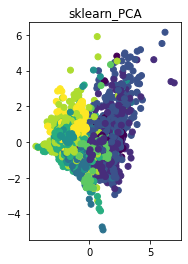

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
X = scaled_features
Y = correct_facies_labels
sklearn_pca = PCA(n_components=6)#降维
data_2d2 = sklearn_pca.fit_transform(X)
plt.subplot(122)
plt.title("sklearn_PCA")
plt.scatter(data_2d2[:, 0], data_2d2[:, 1], c = Y)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_PCA,X_test_PCA,y_train_PCA,y_test_PCA=train_test_split(data_2d2,correct_facies_labels,test_size=0.2,random_state=42)

##PCA的随机森林

In [ ]:
#降到五维效果较好
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(X_train_PCA,y_train_PCA)
print('model')
print(rfmodel)

ypredrf1 = rfmodel.predict(X_test_PCA)
print('confusion matrix')
print(metrics.confusion_matrix(y_test_PCA, ypredrf1))
print('classification report')
print(metrics.classification_report(y_test_PCA, ypredrf1))
print('Accuracy : %f' % (metrics.accuracy_score(y_test_PCA, ypredrf1)))

model
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
confusion matrix
[[ 25  20   0   1   0   0   0   0   0]
 [  5 123  24   0   0   1   0   0   0]
 [  1  30  90   1   2   2   0   0   0]
 [  0   1   1  20   0   5   0   1   0]
 [  1   0   3   5  21   8   0   9   0]
 [  0   0   0   9   3  71   0  17   0]
 [  0   0   1   1   1   1  11   6   1]
 [  0   1   3   9   3  10   4  62   2]
 [  0   0   0   0   0   0   0   0  31]]
classification report
              precision    recall  f1-score   support

 

##PCA的xgboost

Accuracy: 69.86%


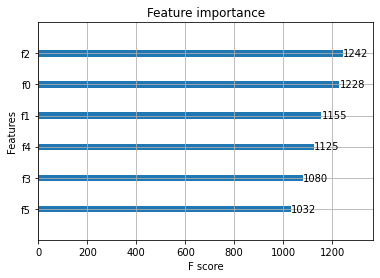

In [ ]:
#降到六维效果较好
from xgboost import plot_importance
from matplotlib import pyplot as plt

import xgboost as xgb
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

params ={'learning_rate': 0.4,
          'max_depth': 20,                # 构建树的深度，越大越容易过拟合
          'num_boost_round':2000,
          'objective': 'multi:softprob', # 多分类的问题
          'random_state': 7,
          'silent':0,
          'num_class':10,                 # 类别数，与 multisoftmax 并用
          'eta':0.8                      #为了防止过拟合，更新过程中用到的收缩步长。eta通过缩减特征 的权重使提升计算过程更加保守。缺省值为0.3，取值范围为：[0,1]
        }
model = xgb.train(params,xgb.DMatrix(X_train_PCA, y_train_PCA))
y_pred=model.predict(xgb.DMatrix(X_test_PCA))

model.save_model('testXGboostClass.model')  # 保存训练模型

yprob = np.argmax(y_pred, axis=1)  # return the index of the biggest pro

predictions = [round(value) for value in yprob]

# evaluate predictions
accuracy = accuracy_score(y_test_PCA, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# 显示重要特征
plot_importance(model)
plt.show()

##PCA的knn

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/Machine-Learning-From-Scratch-master')

Accuracy: 0.7047913446676971


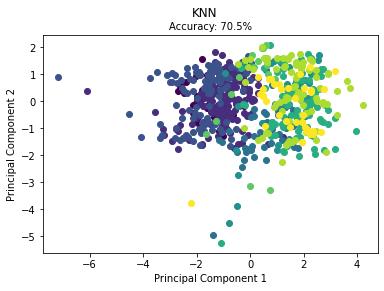

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from utils import train_test_split, normalize, accuracy_score
from utils import euclidean_distance, Plot
class KNN():

    def __init__(self,k=5):

        self.k = k
    def predict(self, X_test, X_train, y_train):

        y_predict = np.zeros(X_test.shape[0])

        for i in range(X_test.shape[0]):

            distances = np.zeros((X_train.shape[0], 2)) #测试的数据和训练的各个数据的欧式距离

            for j in range(X_train.shape[0]):
                dis = euclidean_distance(X_test[i], X_train[j]) #计算欧式距离
                label = y_train[j] #测试集到的每个训练集的数据的分类标签
                distances[j] = [dis, label]

                # argsort()得到测试集到训练的各个数据的欧式距离从小到大排列并且得到序列，然后再取前k个.
                k_nearest_neighbors = distances[distances[:, 0].argsort()][:self.k]

                #利用np.bincount统计k个近邻里面各类别出现的次数
                counts = np.bincount(k_nearest_neighbors[:, 1].astype('int'))

                #得出每个测试数据k个近邻里面各类别出现的次数最多的类别
                testLabel = counts.argmax()
                y_predict[i] = testLabel

        return y_predict

def run():
    #初始化knn
    model = KNN(k=5)
    y_pred = model.predict(X_test_PCA, X_train_PCA, y_train_PCA)

    accuracy = accuracy_score(y_test_PCA, y_pred)

    print("Accuracy:", accuracy)

    # 用图画出测试集的分类情况
    Plot().plot_in_2d(X_test_PCA, y_pred, title="KNN", accuracy=accuracy)


if __name__ == "__main__":
    run()

#LDA降维

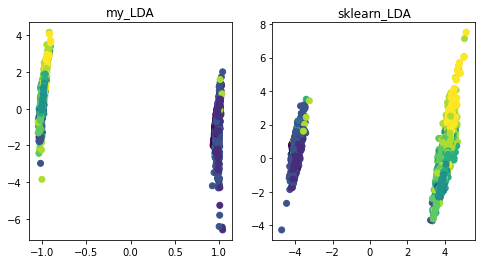

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

def lda(data, target, n_dim):

    clusters = np.unique(target)

    if n_dim > len(clusters)-1:
        print("K is too much")
        print("please input again")
        exit(0)

    #within_class scatter matrix
    Sw = np.zeros((data.shape[1],data.shape[1]))
    for i in clusters:
        datai = data[target == i]
        datai = datai-datai.mean(0)
        Swi = np.mat(datai).T*np.mat(datai)
        Sw += Swi

    #between_class scatter matrix
    SB = np.zeros((data.shape[1],data.shape[1]))
    u = data.mean(0)  #所有样本的平均值
    for i in clusters:
        Ni = data[target == i].shape[0]
        ui = data[target == i].mean(0)  #某个类别的平均值
        SBi = Ni*np.mat(ui - u).T*np.mat(ui - u)
        SB += SBi
    S = np.linalg.inv(Sw)*SB
    eigVals,eigVects = np.linalg.eig(S)  #求特征值，特征向量
    eigValInd = np.argsort(eigVals)
    eigValInd = eigValInd[:(-n_dim-1):-1]
    w = eigVects[:,eigValInd]
    data_ndim = np.dot(data, w)

    return data_ndim

if __name__ == '__main__':
    X=scaled_features
    Y=correct_facies_labels
    data_1 = lda(X, Y, 5)#自己根据数学原理实现LDA

    data_2 = LinearDiscriminantAnalysis(n_components=6).fit_transform(X, Y)#直接调sklearn


    plt.figure(figsize=(8,4))
    plt.subplot(121)
    plt.title("my_LDA")
    plt.scatter(data_1[:, 0], data_1[:, 1], c = Y)

    plt.subplot(122)
    plt.title("sklearn_LDA")
    plt.scatter(data_2[:, 0], data_2[:, 1], c = Y)
    plt.savefig("LDA.png")
    plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_LDA,X_test_LDA,y_train_LDA,y_test_LDA=train_test_split(data_2,correct_facies_labels,test_size=0.2,random_state=42)

##LDA的随机森林

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(X_train_LDA,y_train_LDA)
print('model')
print(rfmodel)

ypredrf1 = rfmodel.predict(X_test_LDA)
print('confusion matrix')
print(metrics.confusion_matrix(y_test_LDA, ypredrf1))
print('classification report')
print(metrics.classification_report(y_test_LDA, ypredrf1))
print('Accuracy : %f' % (metrics.accuracy_score(y_test_LDA, ypredrf1)))

model
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
confusion matrix
[[ 31  14   1   0   0   0   0   0   0]
 [  4 119  28   1   0   1   0   0   0]
 [  0  28  95   1   0   1   0   1   0]
 [  0   0   1  23   1   1   1   1   0]
 [  0   2   1   3  21  11   0   9   0]
 [  0   0   0   7   2  70   1  19   1]
 [  0   0   0   1   1   1  13   5   1]
 [  0   0   1   9   3  15   2  60   4]
 [  0   0   0   0   0   0   0   0  31]]
classification report
              precision    recall  f1-score   support

 

##LDA的xgboost

Accuracy: 66.46%


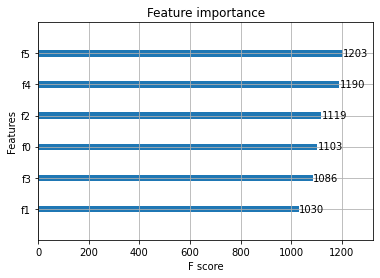

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

import xgboost as xgb
from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

params ={'learning_rate': 0.4,
          'max_depth': 20,                # 构建树的深度，越大越容易过拟合
          'num_boost_round':2000,
          'objective': 'multi:softprob', # 多分类的问题
          'random_state': 7,
          'silent':0,
          'num_class':10,                 # 类别数，与 multisoftmax 并用
          'eta':0.8                      #为了防止过拟合，更新过程中用到的收缩步长。eta通过缩减特征 的权重使提升计算过程更加保守。缺省值为0.3，取值范围为：[0,1]
        }
model = xgb.train(params,xgb.DMatrix(X_train_LDA, y_train_LDA))
y_pred=model.predict(xgb.DMatrix(X_test_LDA))

model.save_model('testXGboostClass.model')  # 保存训练模型

yprob = np.argmax(y_pred, axis=1)  # return the index of the biggest pro

predictions = [round(value) for value in yprob]

# evaluate predictions
accuracy = accuracy_score(y_test_LDA, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# 显示重要特征
plot_importance(model)
plt.show()

##LDA的knn

Accuracy: 0.7047913446676971


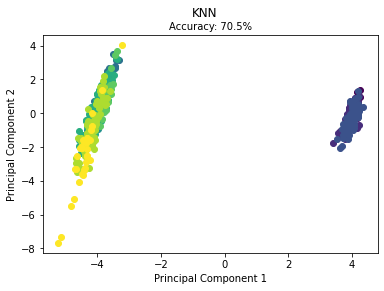

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from utils import train_test_split, normalize, accuracy_score
from utils import euclidean_distance, Plot
class KNN():

    def __init__(self,k=5):

        self.k = k
    def predict(self, X_test, X_train, y_train):

        y_predict = np.zeros(X_test.shape[0])

        for i in range(X_test.shape[0]):

            distances = np.zeros((X_train.shape[0], 2)) #测试的数据和训练的各个数据的欧式距离

            for j in range(X_train.shape[0]):
                dis = euclidean_distance(X_test[i], X_train[j]) #计算欧式距离
                label = y_train[j] #测试集到的每个训练集的数据的分类标签
                distances[j] = [dis, label]

                # argsort()得到测试集到训练的各个数据的欧式距离从小到大排列并且得到序列，然后再取前k个.
                k_nearest_neighbors = distances[distances[:, 0].argsort()][:self.k]

                #利用np.bincount统计k个近邻里面各类别出现的次数
                counts = np.bincount(k_nearest_neighbors[:, 1].astype('int'))

                #得出每个测试数据k个近邻里面各类别出现的次数最多的类别
                testLabel = counts.argmax()
                y_predict[i] = testLabel

        return y_predict

def run():
    #初始化knn
    model = KNN(k=5)
    y_pred = model.predict(X_test_LDA, X_train_LDA, y_train_LDA)

    accuracy = accuracy_score(y_test_LDA, y_pred)

    print("Accuracy:", accuracy)

    # 用图画出测试集的分类情况
    Plot().plot_in_2d(X_test_LDA, y_pred, title="KNN", accuracy=accuracy)


if __name__ == "__main__":
    run()

#KPCA降维

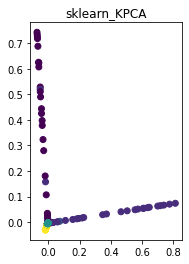

In [21]:
#PCA算法的非线性扩展
from sklearn.datasets import load_iris
from sklearn.decomposition import KernelPCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
X = scaled_features
Y = correct_facies_labels
sklearn_kpca = KernelPCA(n_components=4, kernel="rbf", gamma=15)
data_3 = sklearn_kpca.fit_transform(X)
plt.subplot(122)
plt.title("sklearn_KPCA")
plt.scatter(data_3[:, 0], data_3[:, 1], c = Y)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train_KPCA,X_test_KPCA,y_train_KPCA,y_test_KPCA=train_test_split(data_3,correct_facies_labels,test_size=0.2,random_state=42)

##KPCA的随机森林

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

rfmodel = RandomForestClassifier()
rfmodel.fit(X_train_KPCA,y_train_KPCA)
print('model')
print(rfmodel)

ypredrf1 = rfmodel.predict(X_test_KPCA)
print('confusion matrix')
print(metrics.confusion_matrix(y_test_KPCA, ypredrf1))
print('classification report')
print(metrics.classification_report(y_test_KPCA, ypredrf1))
print('Accuracy : %f' % (metrics.accuracy_score(y_test_KPCA, ypredrf1)))

model
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
confusion matrix
[[12 20  4  0  2  2  0  4  2]
 [16 51 31  5  6 14  6 19  5]
 [ 6 25 45  3  7 14  0 24  2]
 [ 2  6  4  3  1  7  0  5  0]
 [ 2  4 12  2  7 12  1  6  1]
 [ 5 24 25  4  5 12  1 22  2]
 [ 0  3  5  1  0  4  1  5  3]
 [ 6 19 31  3  3 10  1 21  0]
 [ 0  1  1  0  0  1  0  3 25]]
classification report
              precision    recall  f1-score   support

           1       0.24      0.26      0.25        46
           2       0.33     

所以证明我们这个数据不是非线性的